In [237]:
import librosa
import soundfile as sf
import matplotlib.pyplot as plt
import librosa.display
import numpy as np
import shutil
import pandas as pd

import os
import IPython.display

In [72]:
def load(file_name):
    wav = file_name

    file_sr = librosa.get_samplerate(wav)
    y, sr = librosa.load(wav, sr=file_sr)
    return y, sr

In [195]:
import os

file_path = 'capture/txt2/'
file_names = os.listdir(file_path)

In [196]:
for name in file_names:
    print(name)
    src = os.path.join(file_path, name)
    dst = str(int(name[:-4])+38) + '.txt'
    dst = os.path.join(file_path, '플러스', dst)
    os.rename(src, dst)

0.txt
1.txt
10.txt
11.txt
12.txt
13.txt
14.txt
15.txt
16.txt
17.txt
18.txt
19.txt
2.txt
20.txt
21.txt
22.txt
23.txt
24.txt
25.txt
26.txt
27.txt
28.txt
29.txt
3.txt
30.txt
31.txt
32.txt
33.txt
34.txt
35.txt
36.txt
37.txt
38.txt
39.txt
4.txt
40.txt
41.txt
42.txt
43.txt
44.txt
45.txt
46.txt
47.txt
48.txt
49.txt
5.txt
50.txt
51.txt
52.txt
53.txt
54.txt
55.txt
6.txt
7.txt
8.txt
9.txt


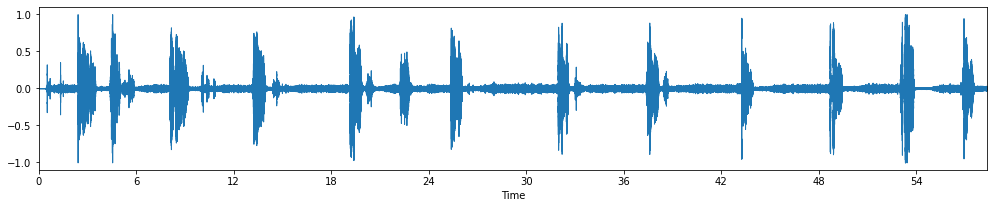

In [276]:
y, sr = load('test_data_2.wav')
plt.figure(figsize=(17,3))
librosa.display.waveplot(y, sr=sr)

In [277]:
sr

16000

In [265]:
def add_noise(input_directory, output_directory, percent):
    file_list = os.listdir(input_directory)
    
    for file in file_list:
        y, sr = load(input_directory+file)
        #random_state = 42
        #rnd_state = np.random.RandomState(random_state)
        
        data = np.c_[y]
        mu = np.mean(data)
        sd = np.std(data)
        
        data_df = pd.DataFrame(data, columns=['Value'])
        data_df['Index'] = data_df.index.values
        
        ratio = np.random.uniform(0.0, percent)

        jitter = ratio*np.random.normal(0, 1, size=data_df.shape[0])
        print(jitter)
        data_df['with_jitter'] = data_df['Value'] + jitter
        
        sf.write(output_directory +file, data_df['with_jitter'], sr, subtype='PCM_16')

In [275]:
add_noise('stt_test/test/전/', 'stt_test/test/후/', 0.001)

[ 3.46293897e-04  1.05508165e-03 -8.83745402e-05 ...  4.33064347e-04
  5.34073068e-04  1.45774474e-03]


In [196]:
sf.write('pause_test/test1.wav', wav, 16000, subtype='PCM_16')

In [214]:
y, sr = load('28.wav')
y1, sr1 = load('29.wav')
y2, sr2 = load('222.wav')

In [215]:
sr, sr1, sr2

(16000, 16000, 16000)

In [222]:
IPython.display.Audio(data=y1[:1600], rate=16000)

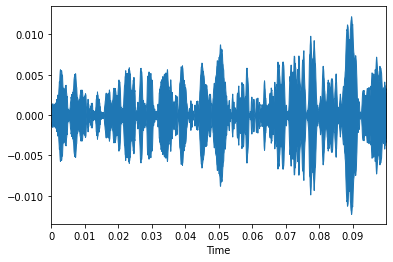

In [223]:
librosa.display.waveplot(y1[:1600], sr=sr)

In [230]:
y2 = [0]*1600

In [210]:
for i in range(len(y2)):
    y2[i] = 1

In [226]:
wav = np.concatenate((y, y2, y2, y2, y2, y2, y2, y2, y2, y2, y2, y2, y2, y2, y2, y2, y2, y2, y2, y2, y2, y2, y2, y2, y2, y2, y1), axis=0)
sf.write('pause_test/2.5.wav', wav, 16000, subtype='PCM_16')

In [232]:
wav = y
for i in range(50):
    wav = np.concatenate((wav, y2), axis=0)
wav = np.concatenate((wav, y1), axis=0)
sf.write('pause_test/5.wav', wav, 16000, subtype='PCM_16')

In [228]:
len(y2)

1600

In [272]:
with open('stt_test/a.txt', 'r') as f:
    data = f.read()
k = data.splitlines()
for i in range(len(k)):
    k[i] = int(k[i])
k = np.array(k)

In [273]:
IPython.display.Audio(data=k, rate=16000)

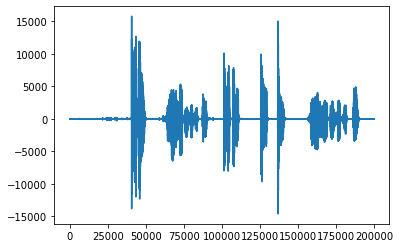

In [205]:
plt.plot(k[:200000])

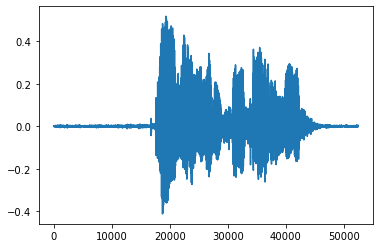

In [188]:
plt.plot(y[444593:497035])
IPython.display.Audio(data=y[444593:497035], rate=16000)

In [90]:
len(k)

100000

In [324]:
np.max(k), np.sum(abs(k)), len(k)

(32000, 316481, 1622)

In [296]:
np.max(k), np.mean(abs(k))

(32000, 2165.7990922249423)

In [309]:
np.max(k), np.mean(abs(k))

(32000, 1399.448946007734)

In [312]:
np.max(k), np.mean(abs(k))

(32000, 2573.3818980332253)

In [294]:
np.max(k), np.mean(abs(k))

(32000, 1204.6803973773333)

In [302]:
np.max(k), np.mean(abs(k))

(32000, 380.95955375790095)

In [322]:
import io
stream_file = 'pause.wav'
with io.open(stream_file, "rb") as audio_file:
    content = audio_file.read()
stream = [content]

for chunk in stream:
    a = np.frombuffer(chunk, np.int16)
    with open('f.txt', 'w') as f:
        for line in a:
            f.writelines(str(line)+'\n')

In [321]:
y, sr = load('pause.wav')
len(y)

1600

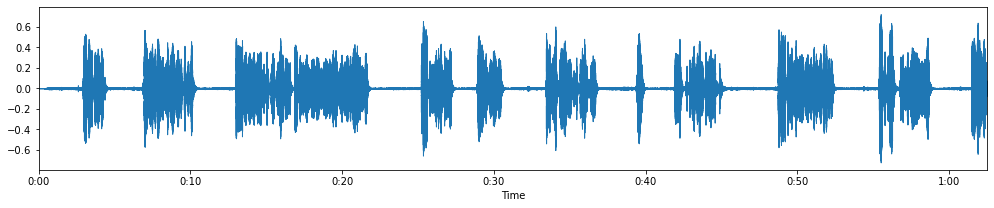

In [351]:
y, sr = load('stt_test/26p.wav')
plt.figure(figsize=(17,3))
librosa.display.waveplot(y[:1000000], sr=sr)

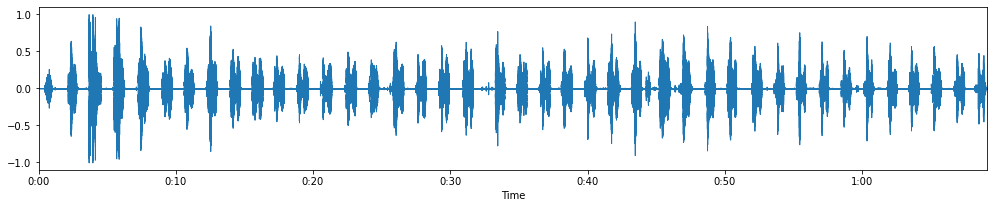

In [264]:
y, sr = load('dh.wav')
plt.figure(figsize=(17,3))
librosa.display.waveplot(y[:], sr=sr)

In [226]:
sf.write('222.wav', y[:1600], sr, subtype='PCM_16')

In [180]:
i = 55

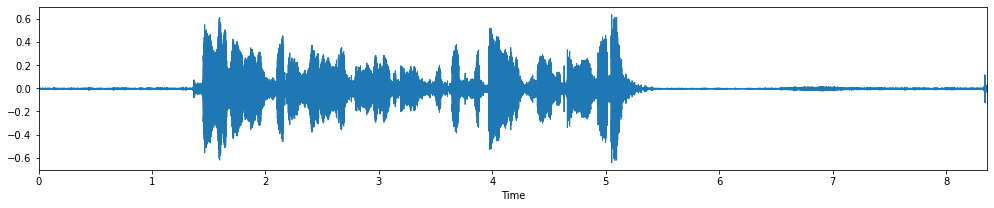

In [181]:
y, sr = load('capture/split2/'+str(i) + '_capture.wav')
plt.figure(figsize=(17,3))
librosa.display.waveplot(y, sr=sr)

In [182]:
sf.write('capture/split2/sentence/'+str(i)+'_capture.wav', y[int(1*sr):int(5.8*sr)], sr, subtype='PCM_16')
i = i+1

In [162]:
i

47

In [111]:
p = [4,10,21,27,30,37,39,45,52,59,67,74,77,83,93,102,109,115,118,123,129,137,144,145,151,153,156,167,172,177,178,185]
for i in range(len(p)-1):
    sf.write('capture/split2/'+str(i+25) +'_capture.wav', y[int(p[i]*sr):int((p[i+1]+2)*sr)], sr, subtype='PCM_16')

In [ ]:
sf.write('capture/'+str(i) +'_capture.wav', y[int(p[i]*sr):int(p[i+1]*sr)], sr, subtype='PCM_16')

In [10]:
def split(y, sr, outputdir, name):
    during = 0.1 * sr
    amount = int(len(y) / during)
    for i in range(amount):
        start = int((i*0.1) * sr)
        end = int(start + during)
        newy = y[0:end]
        resample = librosa.resample(newy, sr, 16000)
        sf.write(outputdir + name + str(i) + ".wav", resample, 16000, subtype='PCM_16')

In [14]:
y, sr = load('capture/capture2_1.wav')
split(y, sr, 'capture/split/0.1secs/capture2_1/', 'capture')

In [184]:
dir = 'capture/split2/sentence/'
filelist = os.listdir(dir)
for file in filelist:
    path = 'capture/split2/0.1secs/'+file[:-4] + '/'
    
    if not os.path.isdir(path):                                                           
        os.mkdir(path)
    y, sr = load(dir+file)
    split(y, sr, path, file[:-4])

In [22]:
y, sr = load('capture/0_capture.wav')
split(y, sr, 'capture/split/', '0_capture')

In [13]:
directory = 'STT_audiobook/wav/'
filelist = os.listdir(directory)

for file in filelist:
    y, sr = load(directory+ file)
    split(y, sr, 'STT_audiobook/split2/', file)

In [116]:
dir1 = 'capture/split/0.1secs/'
files = os.listdir(dir1)
for f in files:
    files2 = os.listdir(dir1+f)
    print(f)
    for f2 in files2:
        print(dir1+f+'/'+f2)

0_capture
capture/split/0.1secs/0_capture/0_capture0.wav
capture/split/0.1secs/0_capture/0_capture1.wav
capture/split/0.1secs/0_capture/0_capture10.wav
capture/split/0.1secs/0_capture/0_capture11.wav
capture/split/0.1secs/0_capture/0_capture12.wav
capture/split/0.1secs/0_capture/0_capture13.wav
capture/split/0.1secs/0_capture/0_capture14.wav
capture/split/0.1secs/0_capture/0_capture15.wav
capture/split/0.1secs/0_capture/0_capture16.wav
capture/split/0.1secs/0_capture/0_capture17.wav
capture/split/0.1secs/0_capture/0_capture18.wav
capture/split/0.1secs/0_capture/0_capture19.wav
capture/split/0.1secs/0_capture/0_capture2.wav
capture/split/0.1secs/0_capture/0_capture20.wav
capture/split/0.1secs/0_capture/0_capture21.wav
capture/split/0.1secs/0_capture/0_capture22.wav
capture/split/0.1secs/0_capture/0_capture23.wav
capture/split/0.1secs/0_capture/0_capture24.wav
capture/split/0.1secs/0_capture/0_capture3.wav
capture/split/0.1secs/0_capture/0_capture4.wav
capture/split/0.1secs/0_capture/0_c

In [11]:
sr

44100

In [4]:
y, sr = load('STT_audiobook/split/1.wav0.wav')

In [18]:
len(y)/3

5348181.333333333

In [21]:
sf.write("00009_1.wav", y[:5000000], sr, subtype='PCM_16')

NameError: name 'subprocess' is not defined

In [56]:
y1, sr1 = load('STT_audiobook/split2/9.wav3.wav')
y2, sr2 = load('audio/split/00008.wav4.wav')
y3, sr3 = load('audio/split/00006.wav5.wav')

In [58]:
wav = np.concatenate((y1, y2, y3), axis=0)

In [59]:
sf.write("example4.wav", wav, sr1, subtype='PCM_16')

In [57]:
sr2

16000

In [45]:
print(wav)

[ 0.01480103  0.02450562  0.02197266 ... -0.05654907 -0.05111694
 -0.04678345]


In [4]:
y, sr = load('audio/original/00006.wav')

In [5]:
sr

16000

In [16]:
sf.write("00006_9.wav", y[548*sr:590*sr], sr, subtype='PCM_16')